In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
x=df.drop(columns=['CustomerID'])  

In [18]:
x.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
type(x)

pandas.core.frame.DataFrame

<Axes: xlabel='Age', ylabel='Count'>

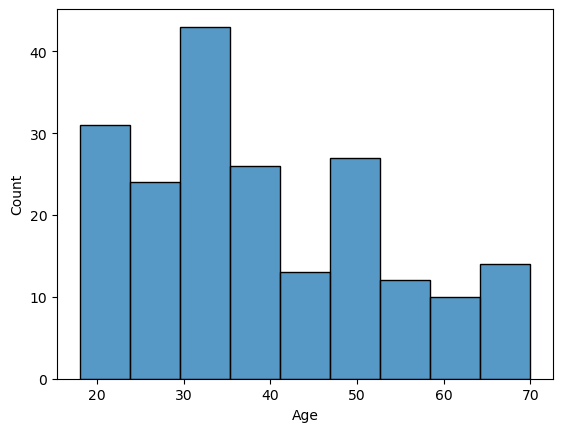

In [11]:
sns.histplot(df.Age)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

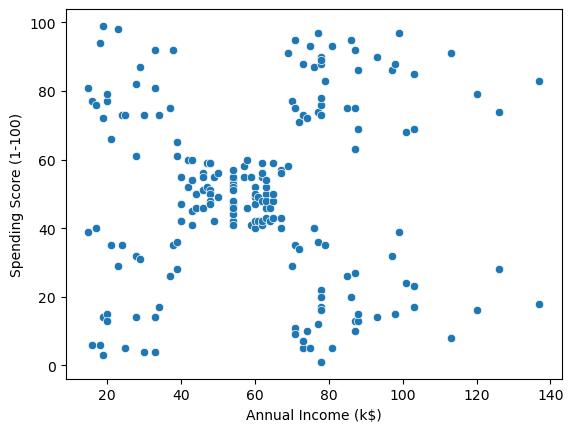

In [10]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

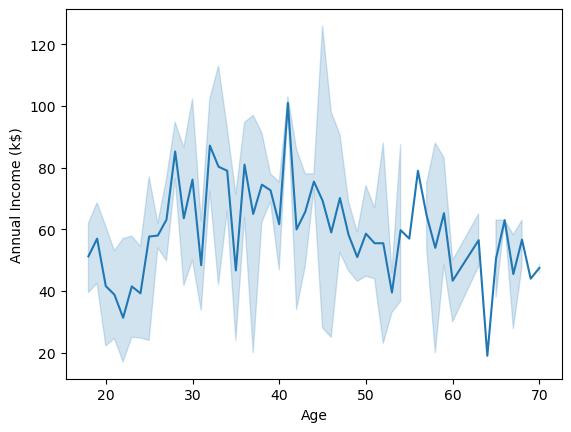

In [12]:
sns.lineplot(x='Age',y='Annual Income (k$)',data=df)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

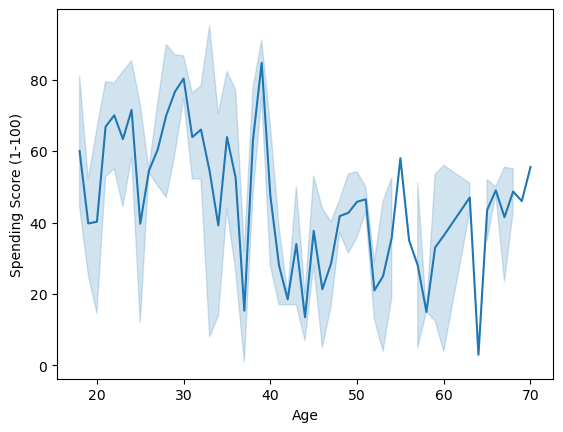

In [13]:
sns.lineplot(x='Age',y='Spending Score (1-100)',data=df)

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
x.Genre=le.fit_transform(x.Genre)
m=dict(zip(le.classes_,range(len(le.classes_))))
m

{'Female': 0, 'Male': 1}

In [14]:
from sklearn.cluster import KMeans

In [20]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

D:\anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the

In [21]:
wcss

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51165.184237107926,
 44389.807673557676,
 40670.989962363215,
 37201.52704476877]

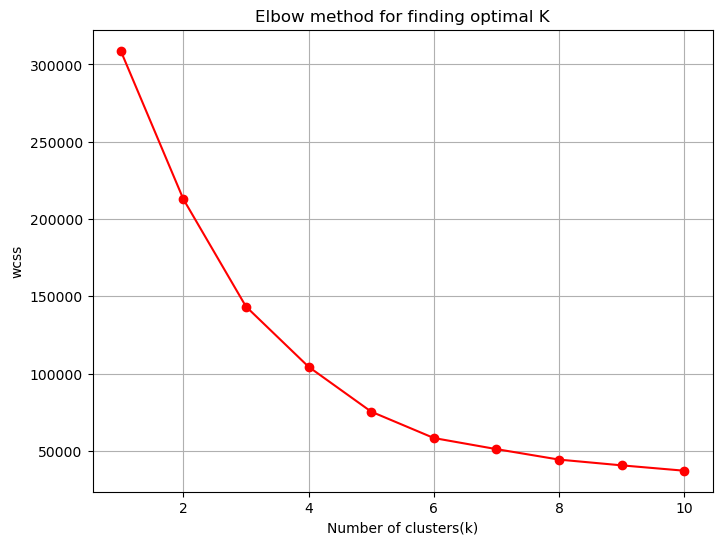

In [22]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker='o',color='red')
plt.title("Elbow method for finding optimal K")
plt.xlabel("Number of clusters(k)")
plt.ylabel("wcss")
plt.grid()
plt.show()

In [23]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
# return a label for data based on their cluster
y_kmeans=kmeans.fit_predict(x)

D:\anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anac\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
y_kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [25]:
x

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [31]:
x[y_kmeans==0]

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
2,0,20,16,6
4,0,31,17,40
6,0,35,18,6
8,1,64,19,3
10,1,67,19,14
12,0,58,20,15
14,1,37,20,13
16,0,35,21,35
18,1,52,23,29


In [37]:
x[y_kmeans==0].count()

Genre                     23
Age                       23
Annual Income (k$)        23
Spending Score (1-100)    23
dtype: int64

In [38]:
x[y_kmeans==1].count()

Genre                     39
Age                       39
Annual Income (k$)        39
Spending Score (1-100)    39
dtype: int64

In [39]:
x[y_kmeans==2].count()

Genre                     79
Age                       79
Annual Income (k$)        79
Spending Score (1-100)    79
dtype: int64

In [40]:
x[y_kmeans==3].count()

Genre                     23
Age                       23
Annual Income (k$)        23
Spending Score (1-100)    23
dtype: int64

In [41]:
x[y_kmeans==4].count()

Genre                     36
Age                       36
Annual Income (k$)        36
Spending Score (1-100)    36
dtype: int64